# Math 725 Advanced Linear Algebra
## HW3


### Brent A. Thorne

brentathorne@gmail.com

##### Linear Transformations
$\require{AMScd}$
$\require{cancel}$
$\newcommand{\null}{\text{null}}$
$\newcommand{\P}{\mathcal{P}}$
$\newcommand{\B}{\mathcal{B}}$
$\newcommand{\0}{\{\Bbb{0}\}}$
$\newcommand{\C}{\Bbb{C}}$
$\newcommand{\1}{\Bbb{1}}$
$\newcommand{\range}{\text{range}}$
$\newcommand{\T}{\mathbf{T}}$
$\newcommand{\U}{\mathbf{U}}$
$\newcommand{\L}{\mathcal{L}}$
$\newcommand{\W}{\mathbf{W}}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\F}{\mathbb{F}}$
$\newcommand{\v}[2]{#1_1...#1_#2}$

In [1]:
# import libraries
import numpy as np
import sympy as sym
from sympy.matrices import Matrix
from sympy import I
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

from sympy import init_printing
init_printing()

## 1. (3A4)
### Suppose $T\in \L(V,W)$ and $v_1,...,v_m$ is a list of vectors in $V$ such that $T v_1,...,T v_m$ is a linearly independent list in $W$. Prove that $v_1,...,v_m$ is linearly independent.

#### Solution:

Recall the definition of linearly independence: A list $\v{v}{m}$ of vectors in $V$ is called $\textbf{linearly independent}$ if the only choice of $\v{a}{m}\in\F$ that make $a_1 v_1+...+a_m v_m$ equal 0 is $a_1=...=a_m=0$.  The empty list $()$ is also declared to be linearly independent. 

Consider that for $T v_1,...,T v_m$ to be linearly independent, the only choice of $\v{a}{m}\in\F$ that make $T a_1 v_1+...+T a_m v_m$ equal 0 is $a_1=...=a_m=0$ (by definition of span).  Thus, $T v_1,...,T v_m$ being linearly independent implies $v_1,...,v_m$ is linearly independent.

$\square$

While this is obvious for a finite dimensional space, by induction we can show it is also true for an infinite vector space.

Consider $a_1 v_1+...+a_{k+1}v_{k+1} = 0$.

Assume that $\lambda_i\neq\lambda_j$ for $i\neq j$, and $v_1,...,v_k$ is independent, where $(k<m)$ and .

$0=T(0)=T(a_1 v_1+...+a_{k+1}v_{k+1})$

$=a_1 T v_1+...+a_{k+1} T v_{k+1} $

$=\lambda_1 a_1 v_1+...+\lambda_{k+1} a_{k+1}v_{k+1} $

Substracting $\lambda_{k+1}(a_1 v_1+...+a_{k+1}v_{k+1})$ from $(\lambda_1 a_1 v_1+...+\lambda_{k+1} a_{k+1}v_{k+1})$ we get,

$(\lambda_1-\lambda_{k+1})a_{1}v_{1}+...+(\lambda_{k}-\lambda_{k+1}) a_{k}v_{k} = 0$.

Since $\lambda_i\neq\lambda_j$ for $i\neq j$, and $v_1,...,v_k$ are independent and by inductive application of the above for $(\lambda_{k+1}, \lambda_{k}, \lambda_{k-1}, ..., \lambda_{1})$ we obtain that

$a_1=...=a_k=0$, by $a_1 v_1+...+a_{k+1}v_{k+1} = 0$, $a_{k+1}=0$ and $v_{k+1}\neq 0$.

Thus $v_1,...,v_{k+1}$ is independent.

$\square\square$

Proof adpated from lecture notes.

## 2. (3A9)
### Give an example of a function $\varphi:\C\mapsto\C$ such that

### $\varphi(w+z)=\varphi(w)+\varphi(z)$

### for all $w,z \in \C$ but $\varphi$ is not linear. (Here $\C$ is thought of as a complex vector space.)
\[There also exists a function $\varphi:\R\mapsto\R$  such that $\varphi$ satisfies the additivity condition above but $\varphi$ is not linear. However, showing the existence of such a function involves considerably more advanced tools.\]

#### Solution:
Consider function $\varphi(a+bi)=bi$, where $a,b\in \R$.  If $w=\alpha_w + \beta_w i$ and $z=\alpha_z + \beta_z i$ where $\alpha_w, \beta_w, \alpha_z, \beta_z\in \R$, such that,

$\varphi(w+z)=\varphi(\alpha_w + \beta_w + \alpha_z + \beta_z) = \beta_w + \beta_z = \varphi(w) + \varphi(z)$.

However, $i\varphi(1)=0 \neq \varphi(i\cdot1)=1$, thus $\varphi$ is nonlinear over $\C$.

\[Also, non-linear over $\R$, but that would be $\varphi:\R\mapsto\C$ rather than $\varphi:\R\mapsto\R$ as the proposed existance.  So that doesn't quite work.\]

In [2]:
# scratch it out...
# knocking out either the real or imaginary parts will make this nonlinear
# ...but maybe we get a bonus if we choose the real part
w,z = sym.symbols('w z')
phi = lambda x: sym.im(x)

display(Latex(f'Additivty: $\\varphi(w+z)==(\\varphi(w)+\\varphi(z))$ is {phi(w+z)==(phi(w)+phi(z))}.'))
display(Latex(f'Multiplitity: $i\\varphi(1)==\\varphi(i1)$ is {sym.I*phi(1)==phi(sym.I*1)}.'))

sym.I*phi(1), phi(sym.I*1)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

See also: https://linearalgebras.com, where I used Rashidi's solution to validate my work.

##### Things to consider:

Does addition create a symmetry matrix?

Is Multiplication/Quotent a mirror/reflection/scale of addition's odd/even symmetry?

Affine matrices and function spaces...

## 3. (3B27)
### Suppose $p\in\mathcal{P}(\R)$. Prove that there exists a polynomial $q\in\mathcal{P}(\R)$ such that $5q''+3q'=p$.
\[This exercise can be done without linear algebra, but it’s more fun to do
it using linear algebra.\]

#### Solution:
Both $p,q \in \P(\R)$ thus this is a linear map, so it would seem we are done before we even get started.  Anyway, let's continue...

Here's is what we'll do...
Suppose $D\in \L( \P(\R), \P(\R) )$ the differentiation map defined by $5D^2q+3Dq =p$, then show that range$D=\P(R)$, thus surjective, hence existance.

Now on with the program...

By defining $D\in \L( \P(\R), \P(\R) )$ as $Dq=q'$, we can note,

deg$Dx^n=n-1$, and that range$D$ is a subspace, hence

span$(Dx,Dx^2,...)\subset$ range$D$ and by Axler '2.31 Spanning list contains a basis',

span$(Dx,Dx^2,DX^3,...)=$ span$(1, x, x^2,...)$.

Hence span$(1,x,x^2,...)\subset$ range$D=\P(\R)$.

Now we can clearly see that $q\in\P(\R)$ exists such that $(5D^2+3D)q =p$, by the surjectivity of $(5D^2+3D)$.  

$\square$

See also: https://linearalgebras.com, where I used Rashidi's solution to clean up my notation.

##### Things to consider:
Recall: A function $T:V\mapsto W$ is $\textit{injective}$ (one-to-one) if $Tu=Tv \implies u=v$.

Also recall: A function $T:V\mapsto W$ is $\textit{sujective}$ (onto) if it's range equals $W$.
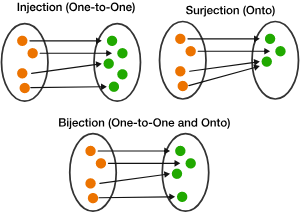

## 4. (3C12)
### Give an example with 2-by-2 matrices to show that matrix multiplication is not commutative.  In other words, find 2-by-2 matrices $A$ and $C$ such that $AC \neq CA$.

#### Solution:
We'll use the property that any square matrix can be uniquely decomposed into a symmetric part and anti-symmetric part (skew-symmetric).  

$A_{sym} = \frac{A+A^T}{2}$

$A_{asym} = \frac{A-A^T}{2}$

$A = A_{sym} + A_{asym}$

In [3]:
# most any random matrix will do the trick
# let's assure we cook up a non-degenerate case
A = Matrix([[0,1],[sym.I,0]])
C = (A-A.T)/2 # we're cooking with antisymmetry

display(Latex(f'Let $A = {sym.latex(A)}$' + 
             f' and $C= {sym.latex(C)}$.'))
display(Latex(f'Then, $AC = {sym.latex(A*C)}$' +
             f' and $CA = {sym.latex(C*A)}$, thus $AC\\neq CA$.'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Solution adapted from Austin J. Hedeman's wonderful Mathematical Physics Lecture Notes.

## 5. (3D11)
### Suppose $V$ is finite-dimensional and $S,T,U\in\L(V)$ and $STU=\1$.

### Show that $T$ is invertible and that $T^{-1}=US$.

#### Solution:
Given,
$STU=\1$

$\implies S^{-1}STU=S^{-1}$

$\implies TUS=S^{-1}S$ 

$\implies T^{-1}TUS=T^{-1}$, which

$\implies US=T^{-1}$, as desired.

$\square$  I like this one!  Something 'gezellig' about it.

## 6. Invertiblity
### Show that the midpoint map $T$ on $C^n$, $(v_1, ..., v_n) \mapsto \frac{1}{2}(v_n+v_1 ,v_1+v_2, ..., v_{n-1}+v_n)$ is invertible if and only if n is odd.

### For $n$ even, determine rank$(T)$.

Recall the definition of $\textit{invertible, inverse}$:

 * A linear map $T\in\L(V,W)$ is called $\textit{invertible}$ if there exist a linear map $S\in\L(W,V)$ such that $ST$ equals the identity map on $V$ and $TS$ equals the identity map on $W$.

 * A linear map $S\in\L(W,V)$ satisfiying $\underbrace{ST=\1}_\text{map on V}$ and $\underbrace{TS=\1}_\text{map on W}$ is called the $\textit{inverse}$ of T.
  
 * Where $ST$ is just the usual composition $S\circ T$ of two functions ($TS=T\circ S$ as well).

#### Solution:
We can see that for an even $n$, the rank$(T^{n\times n})=n-1$, thus for $n$ even, $T(v)=\frac{1}{2}(v_n+v_1 ,v_1+v_2, ..., v_{n-1}+v_n)$ is non-injectivite thus non-invertible.

See "Example: rank$(T^{n\times n})$ for $n$ odd and even" below, where we calculate the rank$(T^{n\times n})$ for even $n$.

$\square$

Now show that the midpoint map $T$ on $C^n$, $(v_1, ..., v_n) \mapsto \frac{1}{2}(v_n+v_1 ,v_1+v_2, ..., v_{n-1}+v_n)$ is invertible if and only if $n$ is odd.

$\Rightarrow$

If there is a isomorphism from $V=$ span{$v_1,...,v_n$} to $W$.

$\underbrace{\null(\T)}_\text{pre-images of null space}=\0$ $\leftarrow$ since $\T$ is injective

range$(T)=W$ $\leftarrow$ since $\T$ is surjective

Thus by Fundemental Theorem of Albebra,

dim$V=$ dim$(\null\T) +$ dim(range$\T$) $\implies$

dim$V = 0 + $ dim$W$ as desired.

$\square\square$

$\Leftarrow$

Now suppose dim$V = $ dim$W$, where $v_1,...,v_n$ is a basis for $V$, and  $w_1,...,w_n$ is a basis for $W$.

Thus, $\T(a_1 v_1,...,a_n v_n) = a_1 w_1,...,a_n w_n$.

We can now see that $T:V\mapsto W$ is linear and $T$ is surjective since {$w_1,...,w_n$} is a spanning list.  Also $\T$ is injective since {$v_1,...,v_n$} is independent.

See "Example: Invertible and Non-invertible Matices" below for additional insight.

$\square\square\square$

#### Example: rank$(T^{n\times n})$ for $n$ odd and even.

In [4]:
# For n even, determine rank(T).
def T(n):
    m = [sym.Rational(1,2)]  + [0 for i in range(n-2)] + [sym.Rational(1,2)] 
    return Matrix([m[-i:] + m[:-i] for i in range(n)]) 
display(Latex('For n even, determine rank(T).'))
display(Latex("We can now see that for even $n$, rank$(T^{n\\times n})=n-1$.  That's quite interesting!"))
display((T(4).rank(), T(3).rank())) # well that's interesting
display(T(4).columnspace())
display(T(4).nullspace())
T(4)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

⎡⎡1/2⎤  ⎡ 0 ⎤  ⎡ 0 ⎤⎤
⎢⎢   ⎥  ⎢   ⎥  ⎢   ⎥⎥
⎢⎢1/2⎥  ⎢1/2⎥  ⎢ 0 ⎥⎥
⎢⎢   ⎥, ⎢   ⎥, ⎢   ⎥⎥
⎢⎢ 0 ⎥  ⎢1/2⎥  ⎢1/2⎥⎥
⎢⎢   ⎥  ⎢   ⎥  ⎢   ⎥⎥
⎣⎣ 0 ⎦  ⎣ 0 ⎦  ⎣1/2⎦⎦

⎡⎡-1⎤⎤
⎢⎢  ⎥⎥
⎢⎢1 ⎥⎥
⎢⎢  ⎥⎥
⎢⎢-1⎥⎥
⎢⎢  ⎥⎥
⎣⎣1 ⎦⎦

⎡1/2   0    0   1/2⎤
⎢                  ⎥
⎢1/2  1/2   0    0 ⎥
⎢                  ⎥
⎢ 0   1/2  1/2   0 ⎥
⎢                  ⎥
⎣ 0    0   1/2  1/2⎦

In [5]:
display((T(3).rank(), T(5).rank()))

#### Example: Invertible and Non-invertible Matices 

In [6]:
# show an invertible case
display(Latex(f'$T\in C^3={sym.latex(T(3))}$, also $T^{-1}\in C^3={sym.latex(T(3).inv())}$'))

<IPython.core.display.Latex object>

In [7]:
# show a non-invertible case
# we'll catch this error to be graceful
T4 = T(4)

try:
    T4_inv = T4.inv()
except ValueError:
    print("We caught an error.")
    T4_inv = "Non-inverible"  # such poise and grace!

display(Latex(f'$T\in C^4={sym.latex(T4)}$, also $T^{-1}\in C^4={sym.latex(T4_inv)}$'))    

We caught an error.


<IPython.core.display.Latex object>

In [8]:
display(Latex('Show some Truth:'))
display([T4.is_positive_definite, T4.is_positive_semidefinite])
display(T4.det())
display(Latex("Well there we go... det$A=0$ if and only if $T$ is non-invertible.")) 
# Axler would hate this, but I think he's wrong about the determinate.
# It's perfectly fine for exploring space computational.

<IPython.core.display.Latex object>

[False, True]

<IPython.core.display.Latex object>

In [9]:
# Drink in the Eiguinness
display(Latex("Check this out!  Looks rather familar, doesn't it"))
display(T4.eigenvects())
display(T4.rref())
display(Latex(f'$T\in C^4 = {sym.latex(T4)} \\leftarrow$ obviously linearly dependent, thus $m\\neq n$.'))

<IPython.core.display.Latex object>

⎡⎛      ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞  ⎛          ⎡⎡ⅈ ⎤⎤⎞  ⎛          ⎡⎡-ⅈ⎤⎤⎞⎤
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜          ⎢⎢  ⎥⎥⎟  ⎜          ⎢⎢  ⎥⎥⎟⎥
⎢⎜      ⎢⎢1 ⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜1   ⅈ     ⎢⎢-1⎥⎥⎟  ⎜1   ⅈ     ⎢⎢-1⎥⎥⎟⎥
⎢⎜0, 1, ⎢⎢  ⎥⎥⎟, ⎜1, 1, ⎢⎢ ⎥⎥⎟, ⎜─ - ─, 1, ⎢⎢  ⎥⎥⎟, ⎜─ + ─, 1, ⎢⎢  ⎥⎥⎟⎥
⎢⎜      ⎢⎢-1⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟  ⎜2   2     ⎢⎢-ⅈ⎥⎥⎟  ⎜2   2     ⎢⎢ⅈ ⎥⎥⎟⎥
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜          ⎢⎢  ⎥⎥⎟  ⎜          ⎢⎢  ⎥⎥⎟⎥
⎣⎝      ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠  ⎝          ⎣⎣1 ⎦⎦⎠  ⎝          ⎣⎣1 ⎦⎦⎠⎦

⎛⎡1  0  0  1 ⎤           ⎞
⎜⎢           ⎥           ⎟
⎜⎢0  1  0  -1⎥           ⎟
⎜⎢           ⎥, (0, 1, 2)⎟
⎜⎢0  0  1  1 ⎥           ⎟
⎜⎢           ⎥           ⎟
⎝⎣0  0  0  0 ⎦           ⎠

<IPython.core.display.Latex object>

##### Things to consider:

A general method to prove truths using Matrices... We're just having a bit of fun here.


See also: Lay, Linear Algerbra and its Appplications, 'The Matrix of a Linear Transformation' which was used as a motivation for establishing Linear Transformations as a method of proof...

$\Rightarrow$

Let's consider $V\in\F^n$ and $W\in\F^m$ and let $T$ be any linear transformation from $V$ to $W$.  To associate a matrix with $T$, we'll choose ordered bases $\mathcal{B}$ and $\mathcal{C}$ for $V$ and $W$, respectively. 

Given any $v \in V$, the coordinate vector $[v]_\mathcal{B}$ is in $\R^n$ and the coordinate vector of its image, $[\T(v)]_\mathcal{C}$, in in $\R^m$.

Now we'll show the connection between $[v]_\mathcal{B}$ and $[\T(v)]_{\mathcal{C}}$, by letting $\{b_1,...,b_n\}$ be a basis $\mathcal{B}$ for $V$.  

Thus if $v = r_1 b_1+...+r_n b_n$, then
$[v]_\mathcal{B}=\begin{bmatrix} r_1\\ \vdots \\r_n \end{bmatrix}$ and 
$\T(v)=\T(r_1 b_1+...+r_n b_n) = r_1 \T(b_1)+...+r_n \T(b_n)$ as $\T$ is linear.

Since, the coordinate mapping from $W$ to $\R^m$ is linear,

$[\T(v)]_\mathcal{C}=r_1[\T(b_1)]_\mathcal{C}+...+r_n[\T(b_n)]_\mathcal{C}$.

Since $\mathcal{C}$-coordinate vector are in $\R^m$, this can be rewritten as,

$[\T(v)]_\mathcal{C}=M[v]_\mathcal{B}$, where 
$M=\begin{pmatrix}[\T(b_1)]_\mathcal{C} && [\T(b_2)]_\mathcal{C} && \dots &&[\T(b_n)]_\mathcal{C} \end{pmatrix}$

Now we have the matrix represenation of $\T$ which is the 'matrix for $T$ relative to the bases $\mathcal{B}$ and $\mathcal{C}$'.

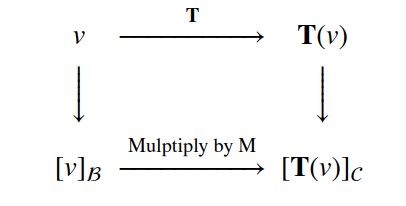

Now that we've layed this out we might as well use matrix multiplications in place of proofs.  However, before we can do that we need one more piece to pull it together.

$\square$ 

<=

Show Simularity of the Diagonal Matrix Representation.  

Suppose $A=P D P^{-1}$, where $D$ is a diagonal $n \times n$ matrix.  If $\mathcal{B}$ is a basis for $\R^n$ formed from the columns of $P$, then $D$ is the $\mathcal{B}$-matrix for the transfromation $v\mapsto Av$.

Consider $b_1,...b_n$ to be the columns of $P$ such that $\mathcal{B}= {b_1,...,b_n}$ and $P=\begin{bmatrix}b_1 && \dots &&b_n \end{bmatrix}$.  

$P$ can now be seen as a change-of-coordinated matrix $P_\mathcal{B}$, where

$P[v]_\mathcal{B}=v$ and $[v]_\mathcal{B}=P^{-1}v$.

If $\T(v)=Av$ for $x\in\R$, then

$[T]_\B = \begin{bmatrix}[\T(b_1)]_\mathcal{B}  && \dots &&[\T(b_n)]_\mathcal{B} \end{bmatrix} \leftarrow$ definition of $[\T]_\B$

$= \begin{bmatrix}[Ab_1]_\mathcal{B}  && \dots &&[Ab_n]_\mathcal{B} \end{bmatrix} \leftarrow$ definition of $[\T(v)]=Av$

$= \begin{bmatrix}P^{-1}Ab_1  && \dots &&P^{-1}Ab_n \end{bmatrix} \leftarrow$ Change of coordinates

$= P^{-1}A\begin{bmatrix}b_1  && \dots &&PAb_n \end{bmatrix} \leftarrow$ Matrix Multiply

$= P^{-1}AP$.

$A=P D P^{-1} \implies [T]_\B=P A P^{-1}=D$.

Now we can see the similarity of two matrices $A$ and $D$,

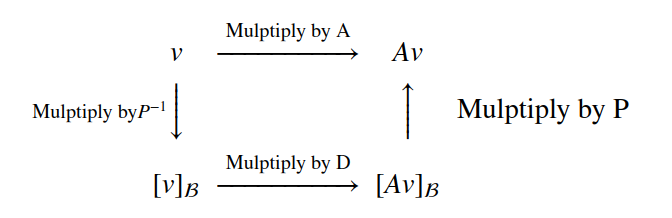

$\square\square$ We have proved that Matrix Multiplication is a valid way to look at the world.  Now we can discover new truths using it.

Now everyway...

<=>


What were we doing again?

Oh yeah, $T$ on $C^n$, $(v_1, ..., v_n) \mapsto \frac{1}{2}(v_n+v_1 ,v_1+v_2, ..., v_{n-1}+v_n)$ is invertible if and only if n is odd.

Pull in Singular Value Decomposition, as we are on a grand tour...

$T^{m\times n}(v)=Av \implies$

$A = U\Sigma V^T=
\begin{pmatrix}
\begin{matrix} \vdots \\ \vec{v_1} \\ \vdots & \end{matrix}
\begin{matrix} \vdots \\ \vec{v_2} \\ \vdots & \end{matrix}
\begin{matrix}  \\ \cdots \\  && \end{matrix}
\begin{matrix} \vdots \\ \vec{v_n} \\ \vdots & \end{matrix}
\end{pmatrix}
\begin{pmatrix}
\begin{matrix} \sigma_1 \\           \\ \\ &\end{matrix}
\begin{matrix}           \\ \sigma_2 \\ \\& \end{matrix}
\begin{matrix}           \\            \\ \ddots \\&\end{matrix}
\begin{matrix}           \\            \\ \\\ \sigma_m &\end{matrix}
\end{pmatrix}
\begin{pmatrix}
\cdots & \vec{v_1} & \cdots \\
\cdots & \vec{v_2} & \cdots \\
       & \vdots    &  \\
\cdots & \vec{v_n} & \cdots \\
\end{pmatrix}$, where $\sigma_i=\sqrt{\lambda_i}$,

Say could something about that dim$(<n,m>)=0$ must be true for invertiblity to wrap this up, but we're just playing around.  We've already shown the shape of this problem in another light.  We'll leave this as a work in progress for the moment.  

We pick this up in P8 (iii) below where we show an example from control theory.  It's a sweet one for sure and even sweeter now that took the time to explore it in the manner above.

Notes:
```
We're trying to paint a picture so we'll use whatever means at our disposal.
We're mixing notation from Strang, Halmos and Lay.
We ought to port this back to Axler, however his basis notation is not as expressive.
We don't care about purity... beauty is our desire.
Beauty is in the eye of the beholder.
```

## 7. Scaling Transformation
### For the map from the previous exercise, let $v_1, ..., v_n$ denote the "regular" polygon vectors on which $T$ acts as a 1-dim complex rescaling. 

### Show that $v_1, ..., v_n$ form a basis for $C^n$.

#### Solution:
Not much to do here as we get this for free with Homogenenity of linear map.  Anyhow, we'll try to be more rigorous, we already have all the tools in place to $V$ has a basis consisting of eigenvectors of $\T$.  See code section for P6 above, "Drink in the Eiguinness".

Consider $v_1,...,v_n \in V$, such that {$v_1,...,v_n$} spans $V$.

span$(\T v_1,...,\T v_n)\subset$ range$T$ and by Axler '2.31 Spanning list contains a basis',

span$(\T v_1,...,\T v_n)=$ span$(v_1,...,v_n)$.

Hence span$(v_1,...,v_n)\subset$ range$T=\C^n$ as desired.



##### Things to consider:
Try showing the basis using diagonalization... 

Something like, if $P = [ b1 ... b2]$, then the basis matrix is $P^{-1} A P$.  We outline this in P6 above.

## 8. Powers and Matrix Functions
### (i) Estimate max modulus of entries in $M^k$ (the $k$th power of a square matrix $M$ whose coefficients have magnitude not exceeding $c$).

#### Solution:
We used a bit of computational experimentaion to find the exact quadratic for the max modulus of entries to be,

$n^{k-2} c^{k-1}$ for $n,c,k\in\R$, $(k>2)$.

In [10]:
c=sym.symbols('c')
n = 2
j = 3
M = c*sym.ones(n,n)

display([M**k for k in range(j)])

display(Latex("Show the modulus of the matrix but that's not really " +
              "what this question is after.  If my understanding is correct..."))

display(Latex('$mod_{max}({M^k}_{n\\times n})=$ ' +
              f'${sym.latex((M**(j-1)).T * M**(j-1))}$, for $k={j}$ and $n={n}$.'))

display(Latex("These entries are what we are after... " +
              '${M^k}_{n\\times n}=$' +
              f'${sym.latex( n**(j-2)*c**(j-1) * sym.ones(n,n))}$, for $k={j}$ and $n={n}$.'))

⎡                ⎡   2     2⎤⎤
⎢⎡1  0⎤  ⎡c  c⎤  ⎢2⋅c   2⋅c ⎥⎥
⎢⎢    ⎥, ⎢    ⎥, ⎢          ⎥⎥
⎢⎣0  1⎦  ⎣c  c⎦  ⎢   2     2⎥⎥
⎣                ⎣2⋅c   2⋅c ⎦⎦

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


$\newcommand{\aws}{\frac{e^{- 2 i \pi \theta}}{2}}$
##### Going deeper...
Recall: For a real vector space, the matrix representation of the adjoint is the transpose of
the matrix represenation. (Let's Keep It Real... for now.)

$\textit{Actually we can see the complex solution, so let's do that too!}$

Recall: A modulus of a matrix $A_{mod} = sqrt(A^\dagger A)$, where $\dagger$ is the Hermitian conjugate. Since $A^\dagger A$ is always positive semidefinite.  

Also Recall: Spectral theorem, then forget about it... We'll consider it below.

Consider a matrix $M$ with $norm \leq 1$.

To assure this $c$ must be $\leq \frac{1}{2}$ for $c\in\R$, or more generally, $\leq \aws$ for $c\in\C$. Thus,

 if $c=\aws$ the modulus will be monotonic for any $k$,

 if $c\lt \aws$ the modulus will vanish as $\lim_{k \to \infty}$, or
    
 if $c\gt \aws$ the modulus will blowup as $\lim_{k \to \infty}$.

In [11]:
# scratch it 
c = sym.symbols('c', real=True)
c = 1/2
M = Matrix([[c,c],[c,c]])
mod = lambda A,k:  (A**k).T*(A**k) # "do a barrel roll", --Star Fox
M.T*M, mod(M,3), mod(M,3).norm() 

⎛⎡0.5  0.5⎤  ⎡0.5  0.5⎤     ⎞
⎜⎢        ⎥, ⎢        ⎥, 1.0⎟
⎝⎣0.5  0.5⎦  ⎣0.5  0.5⎦     ⎠

In [12]:
# scratch deeper by considering complex field
from sympy.physics.quantum.dagger import Dagger # pull out the daggers

c = sym.symbols('c', imaginary=True)
theta = sym.symbols('theta', real=True)
c = sym.exp(-2*sym.pi*sym.I*theta)/2  # cooking up some complexity
display(c)
#display(sym.latex(c))

M = Matrix([[c,c],[c,c]])
mod = lambda A,k:  Dagger(A**k) * (A**k) # "do a barrel roll", --Star Fox
M, M.T*M, mod(M,4).norm()  # same result

⎛⎡ -2⋅ⅈ⋅π⋅θ   -2⋅ⅈ⋅π⋅θ⎤  ⎡ -4⋅ⅈ⋅π⋅θ   -4⋅ⅈ⋅π⋅θ⎤   ⎞
⎜⎢ℯ          ℯ        ⎥  ⎢ℯ          ℯ        ⎥   ⎟
⎜⎢─────────  ─────────⎥  ⎢─────────  ─────────⎥   ⎟
⎜⎢    2          2    ⎥  ⎢    2          2    ⎥   ⎟
⎜⎢                    ⎥, ⎢                    ⎥, 1⎟
⎜⎢ -2⋅ⅈ⋅π⋅θ   -2⋅ⅈ⋅π⋅θ⎥  ⎢ -4⋅ⅈ⋅π⋅θ   -4⋅ⅈ⋅π⋅θ⎥   ⎟
⎜⎢ℯ          ℯ        ⎥  ⎢ℯ          ℯ        ⎥   ⎟
⎜⎢─────────  ─────────⎥  ⎢─────────  ─────────⎥   ⎟
⎝⎣    2          2    ⎦  ⎣    2          2    ⎦   ⎠

##### Things to consider:

$e^M=\sum\limits_{k=0}^{\infty}\frac{M^k}{k!}$, then if M is diagonal.

That is $M = diag(\v{a}{n})$ its exponential is $e^M=diag(e^{a_1},...,e^{a_n})$.

$M=UDU^{-1}$ and $D$ is diagonal, then $e^M=Ue^DU^{-1}$. 

That's a seriousily interesting result!

##### Now let us consider the more general case,

$y(t)=e^{At}y(0)$, 

where $t$ is some constant $(c)$, $A$ is our matrix $(M)$, with some initial state $y(0)$.

#### Share some Computational Thoughts:

In [13]:
# puzzle me this...
t = sym.symbols('t')
A = Matrix([[0,1],[0,0]])

In [14]:
sym.exp(A*t)

⎡1  t⎤
⎢    ⎥
⎣0  1⎦

In [15]:
# puzzle me again...
A = Matrix([[0,1,0],[0,0,1],[0,0,0]])
A, A**2

⎛⎡0  1  0⎤  ⎡0  0  1⎤⎞
⎜⎢       ⎥  ⎢       ⎥⎟
⎜⎢0  0  1⎥, ⎢0  0  0⎥⎟
⎜⎢       ⎥  ⎢       ⎥⎟
⎝⎣0  0  0⎦  ⎣0  0  0⎦⎠

In [16]:
sym.exp(A*t)

⎡       2⎤
⎢      t ⎥
⎢1  t  ──⎥
⎢      2 ⎥
⎢        ⎥
⎢0  1  t ⎥
⎢        ⎥
⎣0  0  1 ⎦

See also:
Gil Strang: https://www.youtube.com/watch?v=LwSk9M5lJx4

### (ii) Show that matrix exponential $exp(M)$ is defined for all *square matrices.

### Assume the natural convergence of matrices defined by simultaneous convergence of each of their entries.

```* matrix exponential is only defined for square matrices```

#### Solution:
Consider M is an $(n\times n)$ matrix with real entries,

$exp(Mt)\equiv e^{Mt}=\sum\limits_{n=0}^{\infty}\frac{t^{n}M^n}{n!}$.  (1)

This series can be shown that it converges for all $t$ and every *square matrix by differentating each term,

$\frac{d}{dt}e^{Mt}=\sum\limits_{n=0}^{\infty}n\frac{t^{n}M^n}{n!}=\sum\limits_{n=1}^{\infty}\frac{t^{n-1}M^n}{(n-1)!}=M\sum\limits_{n=1}^{\infty}\frac{t^{n-1}M^{n-1}}{(n-1)!}=M\sum\limits_{m=0}^{\infty}\frac{t^{m}M^{m}}{m!}=Me^{Mt}$ (2)

$\square$

### (iii) Google and summarize one application of a matrix exponential that is close to your mathematical or applied interest.

#### Solution:
A super powerful one is solving ODEs w/Eigenvalues and Eigenvectors.  The following example is from Linear Control Theory.  

See also, Section 8.2 'Linear Time-Invariant Systems' Brunton/Kutz, from which this example is heavily borrowed... basically copied, but it's a really good one and we want to preserve its form.

##### Consider an Unforced Linear System.  

In the absence of control with measuements of the full state of a dynamical system can be repesented as,

$\frac{d}{dt}x=Ax.$ (1)

The solution $x(t)$ is given by,

$x(t)=e^{At}x(0)$, (2)

where the matrix exponential is defined by,

$e^{At}=\1+At+\frac{A^2t^2}{2}+\frac{A^3t^3}{3}+\cdots$. (3)

The solution in (2) is determined entirely by the eigenvalues and eigenvectors of the matrix $A$.  Now consider the eigendecomposition of $A$,

$AT=T\Lambda$ (4)

In the simplest case, $\Lambda$ is a diagonal matrix of distinct eigen values and $T$ is a matrix whose columns are the corresponding linearly independent eigenvector of $A$.

For diagonal $\Lambda$, the matrix exponential is given by:  

$e^{\Lambda t}=\begin{bmatrix}
\begin{matrix} e^{\lambda_1 t} \\ 0               \\ \vdots \\ 0 \end{matrix}
\begin{matrix} 0               \\ e^{\lambda_2 t} \\  \vdots\\ 0 \end{matrix}
\begin{matrix} \cdots          \\ \cdots           \\ \ddots\\ \cdots \end{matrix}
\begin{matrix} 0                \\ 0 \\ \vdots  \\ e^{\lambda_n t}  \end{matrix}
\end{bmatrix}$ (5)

Rearranging the terms in (4), we find that the represent powers of $\Lambda $ in terms of the eigenvectors and eigenvalues,

$A=T\Lambda T^{-1}$  (6a)

$A^2=(T\Lambda T^{-1})(T\Lambda T^{-1})=(T\Lambda ^2 T^{-1})$ (6b)

$\cdots$

$A^k=(T\Lambda T^{-1})(T\Lambda T^{-1})\cdots(T\Lambda T^{-1})=(T\Lambda ^k T^{-1})$ (6c)

Finally, substituting these expression into (3) yields,

$e^{At} = e^{T\Lambda T^{-1}t} = TT^{-1} + T\Lambda T^{-1}t + \frac{T\Lambda ^2 T^{-1} t^2}{2} + \frac{T\Lambda ^3 T^{-1} t^3}{3} + \cdots$ (7a)

$=T\begin{bmatrix}
\1 + \Lambda t+ \frac{\Lambda ^2t^2}{2} + \frac{\Lambda ^3t^3}{3}
\end{bmatrix} T^{-1}$  (7b)

$=Te^{\Lambda t}T^{-1}$. (7c)

Thus, we see that it is possible to compute the matrix expoential effciently in terms of the eigendecomposition of $\Lambda$.  Moreover, the matrix of eigen vectors $T$ defines a change of coordinated that dramatically simplifies the dynamics:

$x=Tz \implies \stackrel{\cdot}{z}=T^{-1}Ax=T^{-1}ATz \implies \stackrel{\cdot}{z}=\Lambda z$

In other words, changing to the eigenvector coordinate, the dynamics become diagonal.  Combining (2) with (7c), it is possible to write the solution $x(t)$ as

$x(t) = \underbrace{T \underbrace{e^{\Lambda t} \underbrace{T^{-1}x(0)}_{z(0)}}_{z(t)}}_{x(t)}$. (8)

From (8) we see that:
 * The first step, $T^{-1}$ maps the initial condition in physical coordinate, $x(0)$, into eigenvector coordinate, $z(0)$.

 * The next step, advances these inital conditions using the diagonal update $e^{\Lambda t}$, which is considerably simpler in eigenvector coordinates $z$.

 * Finally, multiplying by $T$ maps $z(t)$ back to physical coordinates, $x(t)$.

In addition to making it possible to compute the matrix exponential, and hence the solution $x(t)$, the eigendecomposition of $\Lambda$ is even more useful to understand the dynamics and stability of the system.  We can see from (8) that only the time-varying portion of the solution is $e^{\Lambda t}$.  In general the eigenvalues $\lambda=a+ib$ may be complex numbers, so that the solutions are given by, $e^{\lambda t}=e^{at}(\cos(bt)+i\sin(bt))$.

Thus, if all the eigenvalues $\lambda_k$ have negative real part ($\mathcal{Re}(\lambda)=a<0$), then the system is stable, and solutions all decay to $x=0$ as $t\rightarrow \infty$.  However, if even a single eigenvalue has a postive real part, then the system is unstable and will diverge from the fixed point along the corresponsng unstable eigenvector direction, and moreover, disturbances will likely excite all eigenvectors of the system.

##### Things to consider:
That was truly freaking awesome example from Steven Brunton!

How we can directly apply this to the randomied midpoint polygon map.

Just how much I've forgotten about control system theory.  We'll have to revisit that because we could really have a lot of fun with that now!

#### See also:

http://www.databookuw.com/databook.pdf

https://nhigham.com/2020/05/28/what-is-the-matrix-exponential/

https://en.wikipedia.org/wiki/Matrix_exponential

https://en.wikipedia.org/wiki/Jordan_normal_form

https://en.wikipedia.org/wiki/Nilpotent_matrix

### (iv) By including a printout, illustrate your facility in computing a power and a finite Taylor sum of a random $2\times 2$ matrix. 

#### Solution:
Recall:
$exp(M)\equiv e^M=\sum\limits_{n=0}^{\infty}\frac{M^n}{n!} = \1 + M + \frac{MM}{2!}+\frac{MMM}{3!}+...,$ and converges for any square matrix.

*Note: We are using the formula (1) from (ii) above with $t=1$.

In [17]:
import random
import math
xi = 2
M = Matrix([random.randint(-xi,xi) for i in range(xi**2)]).reshape(xi,xi)

precision = 3
n=10 # selected for 'slide-rule scale' precision of about 2 decimal points
display(Latex(f'$M={sym.latex(M)}$'))

# math.factorial() was a rather lame way to do this however, Strilling is even worse due to error
#factorial = lambda n: np.sqrt(2*np.pi*n) * (n/np.exp(1))**n # NOPE!

# we are crafting artisanal matrices for a slide-rule world.
factorial = math.factorial

e_M_est = sum([M**i/factorial(i) for i in range(n)], sym.zeros(xi)).n(precision)
display(e_M_est) # show our estimate
display(sym.exp(M).n(precision)) # now show the library result

<IPython.core.display.Latex object>

⎡7.39  1.81 ⎤
⎢           ⎥
⎣ 0    0.135⎦

⎡7.39  1.81 ⎤
⎢           ⎥
⎣ 0    0.135⎦

##### Things to consider:
 * We had to keep out $\xi$ values rather small keep the computation times down.
 * Sometimes we get a rather degenerate random matrix that has quite a bit of error.
 * math.factorial() is very slow, don't ever use this for anything practical.
 * Striling Approximation failed in Power Series due to lack of precision.
 * There are several dubious ways to compute the exponention of a matrix.

#### See also:
https://sites.millersville.edu/bikenaga/linear-algebra/matrix-exponential/matrix-exponential.html

Nineteen Dubious Ways to Compute the Exponential of a Matrix: https://www.math.purdue.edu/~yipn/543/matrixExp19-I.pdf

## Appendix 0. Island Song
https://www.youtube.com/watch?v=xXQNdUpCQzw

## Appendix 1. Enjoy Yourself
```
You work and work for years and years, you're always on the go.    
You never take a minute off, too busy makin' dough.
Someday you say, you'll have your fun, when you're a millionaire.    
Imagine all the fun you'll have in your old rockin' chair.

    Enjoy yourself, it's later than you think.
    Enjoy yourself, while you're still in the pink.
    The years go by, as quickly as a wink.
    Enjoy yourself, enjoy yourself, it's later than you think.

You're gonna take that ocean trip, no matter come what may.
You've got your reservations made, but you just can't get away.
Next year for sure, you'll see the world, you'll really get around,
But how far can you travel when you're six feet underground?

Your heart of hearts, your dream of dreams, your ravishing brunette,    
She's left you and she's now become somebody else's pet.
Lay down that gun, don't try my friend to reach the great beyond.    
You'll have more fun by reaching for a redhead or a blond.

    Enjoy yourself, it's later than you think.
    Enjoy yourself, while you're still in the pink.
    The years go by, as quickly as a wink.
    Enjoy yourself, enjoy yourself, it's later than you think.

You never go to night clubs and you just don't care to dance.
You don't have time for silly things like moonlight and romance.
You only think of dollar bills tied neatly in a stack,
But when you kiss a dollar bill, it doesn't kiss you back.

    Enjoy yourself, it's later than you think.
    Enjoy yourself, while you're still in the pink.
    The years go by, as quickly as a wink.
    Enjoy yourself, enjoy yourself, it's later than you think.
```
Lyrics by Herb Magidson

## Appendix 2. Proof Techniques

#### To prove goal of the form:
 - $\neg P:$
     - Reexpress as a positive statement.
     - use proof by contradiction; that is, assue that $P$ is true and try to reach a contradiction.
 - $P\implies Q:$
     - Assume $P$ is true and prove $Q$.
     - Prove the contrapositive; that is, assume that $Q$ is false and prove that $P$ is false.
 - $P\wedge Q:$
     - Prove $P$ and $Q$ seperately.  In other words, treat this as two separate goals: $P$ and $Q$.
 - $P\vee Q:$
     - Assume $P$ is false and prove $Q$, or assume $Q$ is false and prove $P$.
     - Use proof by cases. In each case, either prove $P$ or prove $Q$.
 - $P\iff Q$:
     - Prove $P\implies Q$ and $Q\implies P$, see method above for $P\implies Q$
 - $\forall xP(x):$
     - Let $x$ stand for an arbitrary object, and prove $P(x)$. (If the letter $x$ already stands for something in the proof, you will have to use a different letter for the arbitary object.)
 - $\exists xP(x):$
     - Find a value of $x$ that make $P(n)$ true. Prove $P(n)$ for this value of $x$.
 - $\exists!xP(x):$
     - Prove $\exists xP(x)$ (existence) and $\forall y \forall z((P(y)\wedge P(z)) \implies y=z)$ (uniqueness).
     - Prove the equivalent statement $\exists x(P(x)\wedge P(y)) \implies y=x)).$
 - $\forall n\in \mathbb{N}P(n):$
     - Mathematicall induction: Prove $P(0)$ (base case) and $\forall n\in \mathbb{N}P(n) \implies P(n+1))$ (induction step).
     - Strong induction: Prove $\forall n\in \mathbb{N}[\forall k \lt n P(k) \implies P(n)]$.
 
#### To use a given form:
 - $\neg P:$
    - Reexpress as a positive statement.
    - In a proof by contradiction, you can reach a contradiction by proving $P$.
 - $P\to Q:$
     - If you are also given $P$, or you can prove that $P$ is true, then you can conclude that $Q$ is true.
     - Use the contrapositive: If you are given or can prove that $Q$ is false, then you can condlude that $P$ is false.
 - $P\wedge Q:$
     - Treat this as two givens: $P$ and $Q$.
 - $P\vee Q:$
     - Use proof by cases. In the first case assume that $P$ is true, then in the second case assume the $Q$ is true.
     - If you are also given that $P$ is false, or you can prove that $P$ is false, then you can conclude that $Q$ is true.  Similarly, if you know that $Q$ is false then you can conclude that $P$ is true.
 - $P\iff Q$:
     - Treat this as two givens: $P\implies Q$ and $Q\implies P$.
 - $\forall xP(x):$
     - You can plug in any value, say $a$, for $x$, and conclude that $P(a)$ is true.
 - $\exists xP(x):$
     - Indroduce a new variable, say $x_0$, into the proof, to stand for a particular object for which $P(x_0)$ is true.
 - $\exists!xP(x):$
     - Indroduce a new variable, say $x_0$, into the proof, to stand for a particular object for which $P(x_0)$ is true.  You may assume that $\forall y(P(y) \implies y=x_0$.
 
#### Techniques that can be used in any proof:
 - Proof by contradiction: Assume the goal is false and derive a contradiction.
 - Proof by cases: Consider serveral cases that are $\textit{exhaustive}$, that is, that include all possibilities. Prove the goal in each case.
   
##### * See also, How to Prove It, Velleman
  

### Appendix 4.  Render Commutation Diagrams

\begin{CD}
v @> \T >> \T(v)\\
@VV V  @VV V\\
[v]_\mathcal{B} @> \text{Mulptiply by M} >> [\T(v)]_\mathcal{C}
\end{CD}



\begin{CD}
v @> \text{Mulptiply by A} >> Av\\
@V\text{Mulptiply by}P^{-1} VV  @AAA\text{Mulptiply by P} \\
[v]_\mathcal{B} @> \text{Mulptiply by D} >> [Av]_\mathcal{B}
\end{CD}